In [42]:
import matplotlib.pyplot as plt;
import csv;
import random;
from sklearn.neural_network import MLPClassifier;
import sklearn.ensemble as forest;

import sklearn;

#Step 1: Use our "titanic" dataset in homework #3, and split data in the same way you did in homework #3 - 80% as training and 20% test sets.
data = []
file = open('Titanic.csv', newline = '')
reader = csv.reader(file, delimiter = ',')
i = 0
for row in reader:
    if i > 0:
        row[1] = row[1][:-2]
        if row[4] == 'male':
            row[4] = 0
        else:
            row[4] = 1
        data.append(row)
    i = i + 1
average = 0
ages = 0
for row in data:
    if row[5] != "NA":
        row[5] = float(row[5])
        average = average + row[5]
        ages = ages + 1
average = average / ages
for row in data:
    if row[5] == "NA":
        row[5] = average
total = len(data)
trainsize = int(total * .8)
random.shuffle(data)
train = data[:trainsize]
test = data[trainsize:]
trainX = []
trainY = []
testX = []
testY = []
for row in train:
    newX = [int(row[1]), row[4], row[5], int(row[6])]
    trainX.append(newX)
    trainY.append(int(row[2]))
for row in test:
    newX = [int(row[1]), row[4], row[5], int(row[6])]
    testX.append(newX)
    testY.append(int(row[2]))


In [43]:
#Step 2: Fit the neural network (I used multiple networks to get multiple predictions).
network1 = MLPClassifier(hidden_layer_sizes = (10, 5), solver = "adam", activation ='logistic', alpha = 0.0001, batch_size = 'auto', 
                        learning_rate = 'constant', max_iter = 5000, random_state = 1)
network1.fit(trainX, trainY)
network2 = MLPClassifier(hidden_layer_sizes = (20, 10), solver = "adam", activation = 'logistic', alpha = 0.0001, batch_size = 'auto',
                        learning_rate = 'constant', max_iter = 5000, random_state = 1) 
network2.fit(trainX, trainY)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20, 10), max_iter=5000,
              random_state=1)

In [44]:
#Step 3: Check the performance of the model with out-of-sample accuracy:
network1 = MLPClassifier(hidden_layer_sizes = (10, 5), solver = "adam", activation ='logistic', alpha = 0.0001, batch_size = 'auto', 
                        learning_rate = 'constant', max_iter = 5000, random_state = 1)
network1.fit(trainX, trainY)
network2 = MLPClassifier(hidden_layer_sizes = (20, 10), solver = "adam", activation = 'logistic', alpha = 0.0001, batch_size = 'auto',
                        learning_rate = 'constant', max_iter = 5000, random_state = 1) 
network2.fit(trainX, trainY)
yPredict1 = network1.predict(testX)
yPredict2 = network2.predict(testX)
fatalities = 0
survivors = 0
yPredict1FatalityAccuracy = 0
yPredict1SurvivorAccuracy = 0
yPredict2FatalityAccuracy = 0
yPredict2SurvivorAccuracy = 0
for (i, j, k) in zip(testY, yPredict1, yPredict2):
    if (i == 0):
        fatalities += 1
        if (i == j):
            yPredict1FatalityAccuracy += 1
        if (i == k):
            yPredict2FatalityAccuracy += 1
    if (j == 0):
        survivors += 1
        if (i == j):
            yPredict1SurvivorAccuracy += 1
        if (i == k):
            yPredict2SurvivorAccuracy += 1
print("Network 1 fatality accuracy: ", yPredict1FatalityAccuracy/fatalities, "%")
print("Network 2 fatality accuracy: ", yPredict2FatalityAccuracy/fatalities, "%")
print("Network 1 survivor accuracy: ", yPredict1SurvivorAccuracy/survivors, "%")
print("Network 2 survivor accuracy: ", yPredict2SurvivorAccuracy/survivors, "%")

Network 1 fatality accuracy:  0.8741721854304636 %
Network 2 fatality accuracy:  0.9139072847682119 %
Network 1 survivor accuracy:  0.8098159509202454 %
Network 2 survivor accuracy:  0.8220858895705522 %


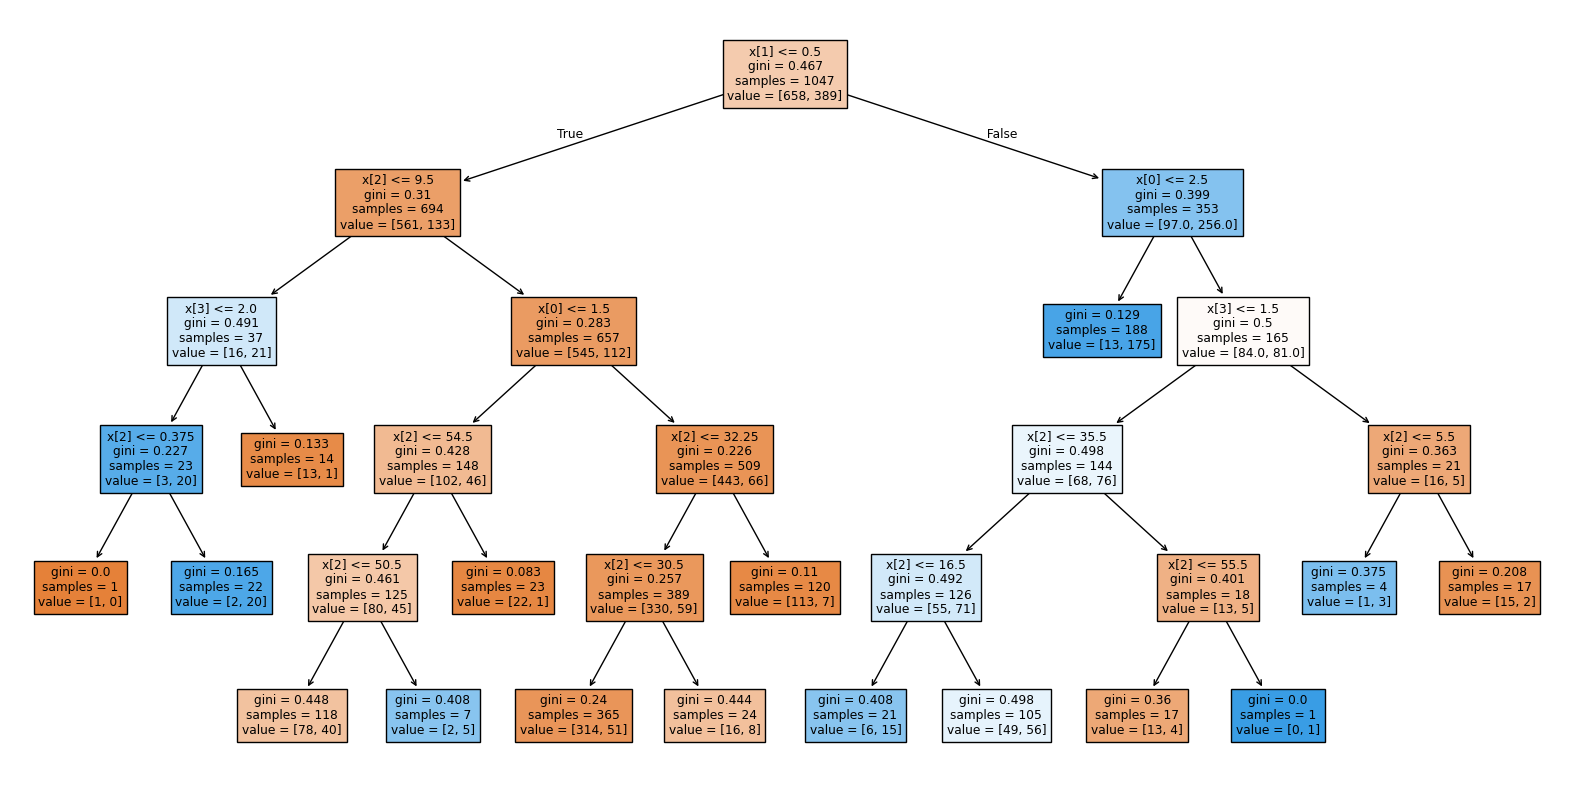

Random forest fatality accuracy:  0.8675496688741722 %
Random forest survivor accuracy:  0.6846846846846847 %


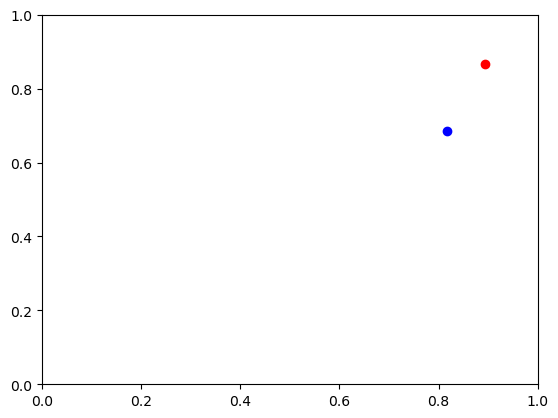

In [45]:
import sklearn.tree as tree
grid = {'max_leaf_nodes': range(2, 100)}
search = sklearn.model_selection.GridSearchCV(tree.DecisionTreeClassifier(random_state = 0), grid, cv = 5, return_train_score = True)
search.fit(trainX, trainY)
tree = search.best_estimator_
plt.figure(figsize = (20, 10))
sklearn.tree.plot_tree(tree, filled = True)
leaves = tree.max_leaf_nodes
Rforest = forest.RandomForestClassifier(n_estimators = 50, max_leaf_nodes = leaves)
Rforest.fit(trainX, trainY)
forestPredicted = Rforest.predict(testX)
plt.show()
forestFatalityAccuracy = 0
forestSurvivorAccuracy = 0
forestFatalities = 0
forestSurvivors = 0
for (i, j) in zip(testY, forestPredicted):
    if (i == 0):
        forestFatalities += 1
        if (i == j):
            forestFatalityAccuracy += 1
    if (i == 1):
        forestSurvivors += 1
        if (i == j):
            forestSurvivorAccuracy += 1
print("Random forest fatality accuracy: ", forestFatalityAccuracy/forestFatalities, "%")
print("Random forest survivor accuracy: ", forestSurvivorAccuracy/forestSurvivors, "%")
network1 = MLPClassifier(hidden_layer_sizes = (10, 5), solver = "adam", activation ='logistic', alpha = 0.0001, batch_size = 'auto', 
                        learning_rate = 'constant', max_iter = 5000, random_state = 1)
network1.fit(trainX, trainY)
network2 = MLPClassifier(hidden_layer_sizes = (20, 10), solver = "adam", activation = 'logistic', alpha = 0.0001, batch_size = 'auto',
                        learning_rate = 'constant', max_iter = 5000, random_state = 1) 
network2.fit(trainX, trainY)
yPredict1 = network1.predict(testX)
yPredict2 = network2.predict(testX)
fatalities = 0
survivors = 0
yPredict1FatalityAccuracy = 0
yPredict1SurvivorAccuracy = 0
yPredict2FatalityAccuracy = 0
yPredict2SurvivorAccuracy = 0
for (i, j, k) in zip(testY, yPredict1, yPredict2):
    if (i == 0):
        fatalities += 1
        if (i == j):
            yPredict1FatalityAccuracy += 1
        if (i == k):
            yPredict2FatalityAccuracy += 1
    if (j == 0):
        survivors += 1
        if (i == j):
            yPredict1SurvivorAccuracy += 1
        if (i == k):
            yPredict2SurvivorAccuracy += 1
xData = [((yPredict1FatalityAccuracy/fatalities) + (yPredict2FatalityAccuracy/fatalities)) / 2, 
         ((yPredict1SurvivorAccuracy/survivors) + (yPredict2SurvivorAccuracy/survivors)) / 2]
yData = [forestFatalityAccuracy/forestFatalities, forestSurvivorAccuracy/forestSurvivors]
plt.plot(((yPredict1FatalityAccuracy/fatalities) + (yPredict2FatalityAccuracy/fatalities)) / 2, forestFatalityAccuracy/fatalities, 'ro')
plt.plot(((yPredict1SurvivorAccuracy/survivors) + (yPredict2SurvivorAccuracy/survivors)) / 2, forestSurvivorAccuracy/forestSurvivors, 'bo')
ax = plt.gca()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()


The plot above shows the accuracy of prediction for fatalities (in red) and survivors (in blue). The x axis represents the accuracy of the neural network and the y axis represents tha accuracy of the random forest. It is important to note that while the accuracy of fatalities is similar for both neural network and random forest, the accuracy of the fatalities for the random forest is notably less than that of the neural network.